## **heart disease severity classification using tabular data**

In [9]:
#task 1



#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


#importing dataset
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI_CW2/Dataset1.csv")



#x variable
x = df1.drop(columns=['id', 'level'], axis=1).fillna(df1.median(numeric_only=True)).fillna('Unknown')

#y binary
y_binary = df1['level'].replace({0:0, 1:1, 2:1, 3:1, 4:1})

#y multiclass
y_multi = df1['level']



#onehotencoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
cat_cols = ["sex", "Origin", "cp", "restecg", "slope", "thal"]
encoder_transform = encoder.fit_transform(df1[cat_cols])

x = pd.concat([x, encoder_transform], axis=1).drop(columns = ['sex', 'Origin', 'cp', 'restecg', 'thal', 'slope'])

x = pd.get_dummies(
    x,
    columns=['fbs', 'exang'],
    drop_first=True)



#splitting the datasets
x_train, x_test, y_bin_train, y_bin_test, y_multi_train, y_multi_test  = train_test_split(x, y_binary, y_multi, test_size=0.2, random_state=100, stratify=y_multi)



#standardscaler
scaler_train = StandardScaler().fit(x_train)
x_train_scaled = scaler_train.transform(x_train)
x_test_scaled = scaler_train.transform(x_test)



#logistic regression for binary
lr_bin = LogisticRegression(max_iter=5000)
lr_bin.fit(x_train_scaled, y_bin_train)

y_bin_train_pred_lr = lr_bin.predict(x_train_scaled)
y_bin_test_pred_lr = lr_bin.predict(x_test_scaled)


lr_multi = LogisticRegression(max_iter=5000)
lr_multi.fit(x_train_scaled, y_multi_train)

y_multi_train_pred_lr = lr_multi.predict(x_train_scaled)
y_multi_test_pred_lr = lr_multi.predict(x_test_scaled)



svm_bin = SVC()
svm_bin.fit(x_train_scaled, y_bin_train)

y_bin_train_pred_svm = svm_bin.predict(x_train_scaled)
y_bin_test_pred_svm = svm_bin.predict(x_test_scaled)


svm_multi = SVC()
svm_multi.fit(x_train_scaled, y_multi_train)

y_multi_train_pred_svm = svm_multi.predict(x_train_scaled)
y_multi_test_pred_svm = svm_multi.predict(x_test_scaled)





#metrics/results for classification
bin_lr = (classification_report(y_bin_test, y_bin_test_pred_lr))
bin_svm = (classification_report(y_bin_test, y_bin_test_pred_svm))
multi_lr = (classification_report(y_multi_test, y_multi_test_pred_lr))
multi_svm = (classification_report(y_multi_test, y_multi_test_pred_svm))
print("binary & Logistic Regression")
print("")
print(bin_lr)
print("")
print("binary & SVM")
print("")
print(bin_svm)
print("")
print("")
print("")
print("multi-class & Logistic Regression")
print("")
print(multi_lr)
print("")
print("multi-class & SVM")
print("")
print(multi_svm)

binary & Logistic Regression

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        82
           1       0.84      0.85      0.84       102

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184


binary & SVM

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        82
           1       0.81      0.88      0.85       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.82       184
weighted avg       0.82      0.82      0.82       184




multi-class & Logistic Regression

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        82
           1       0.57      0.47      0.52        53
           2       0.25      0.18      0.21        22
           3       0.21      0.29      0.24   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Heart disease detection using X-ray images**

/tmp/ipython-input-42508910.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df2['type'].replace({
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.4733 - loss: 1.4029 - val_accuracy: 0.6500 - val_loss: 0.6701
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6190 - loss: 0.6713 - val_accuracy: 0.6500 - val_loss: 0.6493
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6580 - loss: 0.6548 - val_accuracy: 0.6500 - val_loss: 0.6324
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6112 - loss: 0.6733 - val_accuracy: 0.6500 - val_loss: 0.6423
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6710 - loss: 0.6439 - val_accuracy: 0.6500 - val_loss: 0.6363
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6671 - loss: 0.6328 - val_accuracy: 0.6500 - val_loss: 0.6310
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6919 - loss: 0.6031 - val_accuracy: 0.6500 - val_loss: 0.6200
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6658 - loss: 0.6011 - val_accuracy: 0.7000 - val_loss: 0.6253
Epoch 9/

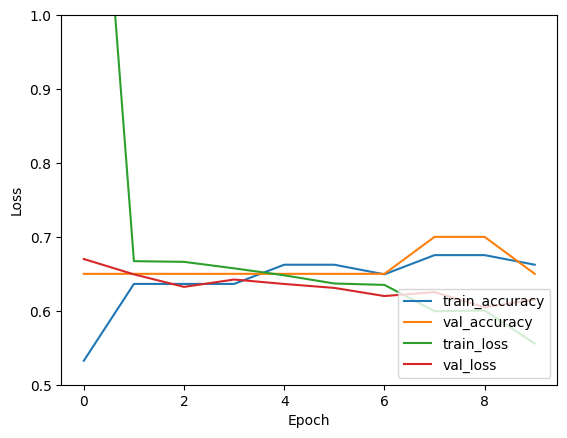

In [10]:
#task 2



#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Activation, Flatten, MaxPooling2D
from tensorflow.keras import models, layers


#importing dataset
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI_CW2/xray_chest.csv")


#updating .jpg filepaths in jpg column
jpg_path = "/content/drive/MyDrive/Colab Notebooks/AI_CW2/files"
df2['jpg'] = jpg_path + df2['jpg']



img_size = (256, 256)

#creating label by tranforming type column into binary
x = df2.drop(columns=['type'])

#apply .imread() function
def image_to_array(jpg_path):
  img = Image.open(jpg_path).convert("L")
  img = img.resize(img_size)
  img = np.array(img, dtype=np.float32)/255
  return img

#call to image_to_array function
x["jpg"] = x["jpg"].apply(image_to_array)


#transforming label values in type column into binary
y = df2['type'].replace({
    "abscess": 0, "ards": 0, "atelectasis": 0,
    "atherosclerosis of the aorta": 1, "cardiomegaly": 1,
    "emphysema": 0, "fracture": 0, "hydropneumothorax": 0,
    "hydrothorax": 0, "pneumonia": 1, "pneumosclerosis": 1,
    "post-inflammatory changes": 1, "post-traumatic ribs deformation": 1,
    "sarcoidosis": 0, "scoliosis": 0, "tuberculosis": 0,
    "venous congestion": 0})

#converting input images into 3D tensor and reshaped with channel dimension
X = np.stack(x['jpg'].values, axis=0)
X = np.expand_dims(X, axis=-1)

#splitting into training and validation sets
(train_X, val_X, train_y, val_y) = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)



#building CNN model
model = models.Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


#Compile CNN model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#fitting CNN model
hist = model.fit(train_X, train_y, epochs=10, validation_data=(val_X, val_y))

# Visualise the accuracy curve during training
plt.plot(hist.history['accuracy'], label='train_accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Visualise the loss curve during training
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(val_X,  val_y, verbose=2)
print('Test accuracy = ','{0:.2f}'.format(test_acc*100),'%')


## **Image Noise and Reconstruction**

In [ ]:
#task 3

#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
from sklearn.metrics import mean_squared_error



#importing dataset
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI_CW2/xray_chest.csv")


#updating .jpg filepaths in jpg column
jpg_path = "/content/drive/MyDrive/Colab Notebooks/AI_CW2/files"
df2['jpg'] = jpg_path + df2['jpg']


#image input size
img_size = (128, 128)

#dropping label column from x
x = df2.drop(columns=['type'])

#converting image to pixel data(array)
def image_to_array(jpg_path):
  img = Image.open(jpg_path).convert("L")
  img = img.resize(img_size)
  img = np.array(img, dtype=np.float32)/255
  return img

x = df2.drop(columns=["type"]).copy()
x["jpg"] = x["jpg"].apply(image_to_array)


#converting input images into 3D tensor and adding channel dimension
X = np.stack(x['jpg'].values, axis=0).astype(np.float32)
X = np.expand_dims(X, axis=-1)

#creating noise
def add_gaussian_noise(images, var=0.001):
    sigma = np.sqrt(var).astype(np.float32)
    noise = np.random.normal(0.1, sigma, size=images.shape).astype(np.float32)
    return (images + noise)

X_noisy = add_gaussian_noise(X, var=0.001)

inputs = keras.Input(shape=(128, 128, 1))


#autoencoder

#Encoder
x = layers.Conv2D(32, 3, activation="relu", padding="same")(inputs)
x = layers.Conv2D(32, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(2, padding="same")(x)

#Bottleneck
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)

#Decoder
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)

x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(32, 3, activation="relu", padding="same")(x)
x = layers.Conv2D(32, 3, activation="relu", padding="same")(x)

outputs = layers.Conv2D(1, 1, activation="sigmoid", padding="same")(x)

autoencoder = keras.Model(inputs, outputs)
autoencoder.compile(optimizer="adam", loss="mae")

autoencoder.fit(
    X_noisy,
    X,
    epochs=15,
    batch_size=32,
    validation_split=0.2
)

#displaying images (index selects a specific row from dataframe)
index = 55
X_recon = autoencoder.predict(X_noisy, verbose=0)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Clean")
plt.imshow(X[index].squeeze(), cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Noisy")
plt.imshow(X_noisy[index].squeeze(), cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Reconstructed")
plt.imshow(X_recon[index].squeeze(), cmap="gray")
plt.axis("off")

plt.show()


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 7s/step - loss: 0.2452 - val_loss: 0.2541
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 7s/step - loss: 0.2433 - val_loss: 0.2232
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 7s/step - loss: 0.2294 - val_loss: 0.2261
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - loss: 0.2347 - val_loss: 0.1989
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - loss: 0.1997 - val_loss: 0.1706
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - loss: 0.1812 - val_loss: 0.1501
Epoch 7/15
2/3 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.1602  

## **Application**

In [35]:
#importing libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from io import BytesIO

import ipywidgets as widgets
from ipywidgets import Layout, Button, Box, VBox, HBox, interact
from IPython.display import display

from PIL import Image
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Activation, Flatten, MaxPooling2D
from tensorflow.keras import models, layers

#importing dataset
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI_CW2/Dataset1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI_CW2/xray_chest.csv")

#GUI
title = widgets.HTML("<h1><center><font color='red'> Disease Detection </font><center><h1>")
tabular_title = widgets.HTML("<h2><center><font color='red'> Enter Patient Data </font><center><h2>")
upload_title = widgets.HTML("<h2><center><font color='red'> Upload X-ray Image </font><center><h2>")

age = widgets.IntText(description='age')
trestbps = widgets.IntText(description='trestbps')
chol = widgets.IntText(description='chol')
thalch = widgets.IntText(description='thalch')
oldpeak = widgets.IntText(description='oldpeak')
ca = widgets.IntText(description='ca')
cp = widgets.Dropdown(options=['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],description='cp')
restecg = widgets.Dropdown(options=['lv hypertrophy', 'normal', 'st-t abnormality'],description='restecg')
sex = widgets.Dropdown(options=['Male', 'Female'], description='sex')
origin = widgets.Text(description='origin')
slope = widgets.Dropdown(options=[ 'downsloping', 'flat', 'upsloping'], description='slope')
thal = widgets.Dropdown(options=['fixed defect', 'normal', 'reversable defect'], description='thal')
fbs = widgets.Dropdown(options=['True', 'False'], description='fbs')
exang = widgets.Dropdown(options=['True', 'False'],description='exang')
detect_btn = widgets.Button(description="Detect", button_style='danger', font_size='15px')
detect_btn_2 = widgets.Button(description="Detect", button_style='danger', font_size='15px')
text_input = VBox([tabular_title, age, sex, origin, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal])
text_input.layout = Layout(align_self="center", width = "100%")
file_upload = widgets.FileUpload()



#tabular data

#x and y
X = df1.drop(columns=["id", "level"], axis=1).copy()
y = df1["level"].replace({0:0, 1:1, 2:1, 3:1, 4:1})

#fill null values in X
X = X.fillna(X.median(numeric_only=True)).fillna("Unknown")

#one hot encoding X
cat_cols = ["sex", "Origin", "cp", "restecg", "slope", "thal"]
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

X_cat = encoder.fit_transform(X[cat_cols])
X = pd.concat([X.drop(columns=cat_cols), X_cat], axis=1)

#splitting into train/test sets
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=100,
    stratify=y
)


#removing extra columns create from one hot encoding
x_train = pd.get_dummies(x_train, columns=["fbs", "exang"], drop_first=True)
x_test  = pd.get_dummies(x_test,  columns=["fbs", "exang"], drop_first=True)
#ensuring x_train and x_test columns are the same
feature_order = x_train.columns
x_test = x_test.reindex(columns=feature_order, fill_value=0)




# scaling X
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

# train model
lr_bin = LogisticRegression(max_iter=5000)
lr_bin.fit(x_train_scaled, y_train)

#predict user data
def predict_user(record_dict):
    X_user = pd.DataFrame([record_dict])
    X_user = X_user.fillna(X.median(numeric_only=True)).fillna("Unknown")

    X_user_cat = encoder.transform(X_user[cat_cols])
    X_user_proc = pd.concat([X_user.drop(columns=cat_cols), X_user_cat], axis=1)
    X_user_proc = pd.get_dummies(X_user_proc, columns=["fbs", "exang"], drop_first=True)
    X_user_proc = X_user_proc.reindex(columns=feature_order, fill_value=0)

    # scale using training scaler
    X_user_scaled = scaler.transform(X_user_proc)

    # predict
    pred = lr_bin.predict(X_user_scaled)[0]
    proba = lr_bin.predict_proba(X_user_scaled)[0][1]
    return pred, proba


#Detect button function
out = widgets.Output()

def on_detect_click(_):
    record = {
        "age": age.value,
        "sex": sex.value,
        "Origin": origin.value,
        "cp": cp.value,
        "trestbps": trestbps.value,
        "chol": chol.value,
        "fbs": fbs.value,
        "restecg": restecg.value,
        "thalch": thalch.value,
        "exang": exang.value,
        "oldpeak": oldpeak.value,
        "slope": slope.value,
        "ca": ca.value,
        "thal": thal.value,
    }

    output = widgets.Output()

    pred, proba = predict_user(record)

    with out:
        out.clear_output()
        display(output)
        result = 'Disease'if pred == 1 else 'No disease'
        print(f"Result: {result}")




#x-ray images


#updating .jpg filepaths in jpg column
jpg_path = "/content/drive/MyDrive/Colab Notebooks/AI_CW2/files"
df2['jpg'] = jpg_path + df2['jpg']



img_size = (256, 256)

#creating label by tranforming type column into binary
x_img = df2.drop(columns=['type'])

#apply .imread() function
def image_to_array(jpg_path):
  img = Image.open(jpg_path).convert("L")
  img = img.resize(img_size)
  img = np.array(img, dtype=np.float32)/255
  return img

#call to image_to_array function
x_img["jpg"] = x_img["jpg"].apply(image_to_array)


#transforming label values in type column into binary
y = df2['type'].replace({
    "abscess": 0, "ards": 0, "atelectasis": 0,
    "atherosclerosis of the aorta": 1, "cardiomegaly": 1,
    "emphysema": 0, "fracture": 0, "hydropneumothorax": 0,
    "hydrothorax": 0, "pneumonia": 1, "pneumosclerosis": 1,
    "post-inflammatory changes": 1, "post-traumatic ribs deformation": 1,
    "sarcoidosis": 0, "scoliosis": 0, "tuberculosis": 0,
    "venous congestion": 0})

#converting input images into 3D tensor
X_img = np.stack(x_img['jpg'].values, axis=0)
#reshaped to include channel dimension
X_img = np.expand_dims(X_img, axis=-1)

#splitting into training and validation sets
(train_X, val_X, train_y, val_y) = train_test_split(X_img, y, random_state=42, test_size=0.2, stratify=y)



#building CNN model
model = models.Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#Compile CNN model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#fitting CNN model
disease = model.fit(train_X, train_y, epochs=10, validation_data=(val_X, val_y))

img_size = (256, 256)

def predict_image_from_widget(file_upload_widget):

    uploaded = next(iter(file_upload_widget.value.values()))
    content = uploaded["content"]

    img = Image.open(BytesIO(content)).convert("L")
    img = img.resize(img_size)

    arr = np.array(img, dtype=np.float32) / 255.0
    arr = arr[..., np.newaxis]
    arr = arr[np.newaxis, ...]

    pred = model.predict(arr)[0]

    return pred


#detect button click function
out_2 = widgets.Output()

def on_upload_detect(_):
  pred = predict_image_from_widget(file_upload)

  with out_2:
    out_2.clear_output()
    result = 'Disease'if pred >= 0.6 else 'No disease'
    print(f"Result: {result}")
  print (pred)
  #clear upload when detect button is clicked
  file_upload.value.clear()
  file_upload._counter = 0



#applying function to button click
detect_btn.on_click(on_detect_click)
detect_btn_2.on_click(on_upload_detect)

#constructing application interface and loading application
upload_container = VBox([out_2, detect_btn_2, upload_title, file_upload])
box = VBox([title, out, detect_btn, text_input, upload_container])

detect_btn.layout = Layout(align_self="center", margin="25px")
detect_btn_2.layout = Layout(align_self="center", margin="25px")
file_upload.layout = Layout(align_self="center")
upload_container.layout = Layout(align_self="center", width = "15%", margin="30px")
out.layout = Layout(align_self="center")
out_2.layout = Layout(align_self="center", margin="5px")
text_input.layout = Layout(align_self="center", width = "25%")

box.layout = Layout(justify_self="center", justify_content="center", border = "solid", width = "50%")

box



/tmp/ipython-input-4252599739.py:177: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df2['type'].replace({
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.4135 - loss: 1.4366 - val_accuracy: 0.6500 - val_loss: 0.6832
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.4668 - loss: 0.6986 - val_accuracy: 0.6500 - val_loss: 0.6662
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6385 - loss: 0.6656 - val_accuracy: 0.6500 - val_loss: 0.6363
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6424 - loss: 0.6548 - val_accuracy: 0.6500 - val_loss: 0.6362
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6268 - loss: 0.6499 - val_accuracy: 0.6500 - val_loss: 0.6320
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6385 - loss: 0.6217 - val_accuracy: 0.6500 - val_loss: 0.6432
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6294 - loss: 0.6090 - val_accuracy: 0.6500 - val_loss: 0.6323
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6450 - loss: 0.5918 - val_accuracy: 0.7000 - val_loss: 0.6248
Epoch 9/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
[0.7006464]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
[0.03070365]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[0.70172375]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[0.3918731]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[0.70669687]
